In [1]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Data directory paths
normal_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/AI_Medical_Proj1/Normal'
tb_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/AI_Medical_Proj1/TB'

In [4]:
# image size
image_size = (224, 224)

# Loading images and labels
images = []
labels = []

In [5]:
for filename in os.listdir(normal_dir):
    # Convert filename to string
    filename = str(filename)
    img_path = os.path.join(normal_dir, filename)
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img)
    images.append(img_array)
    labels.append(0) # Healthy lungs labeled as 0

In [6]:
# Load TB images
for filename in os.listdir(tb_dir):
    # Convert filename to string
    filename = str(filename)
    img_path = os.path.join(tb_dir, filename)
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img)
    images.append(img_array)
    labels.append(1) # TB lungs labeled as 1

In [7]:
# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [16]:
# Normalizing images
images = images/255.0

In [9]:
# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
# CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
9/9 [==============================] - 8s 217ms/step - loss: 1.0656 - accuracy: 0.5000 - val_loss: 0.6255 - val_accuracy: 0.7500
Epoch 2/5
9/9 [==============================] - 0s 55ms/step - loss: 0.5362 - accuracy: 0.7296 - val_loss: 0.3170 - val_accuracy: 0.9559
Epoch 3/5
9/9 [==============================] - 1s 70ms/step - loss: 0.3408 - accuracy: 0.8444 - val_loss: 0.1627 - val_accuracy: 0.9706
Epoch 4/5
9/9 [==============================] - 1s 64ms/step - loss: 0.1439 - accuracy: 0.9519 - val_loss: 0.0717 - val_accuracy: 0.9706
Epoch 5/5
9/9 [==============================] - 1s 59ms/step - loss: 0.0535 - accuracy: 0.9889 - val_loss: 0.1720 - val_accuracy: 0.9706


In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 15ms/step - loss: 0.1720 - accuracy: 0.9706
Test accuracy: 0.970588207244873


In [13]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'TB']))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

3/3 [==============================] - 0s 16ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98        43
          TB       1.00      0.92      0.96        25

    accuracy                           0.97        68
   macro avg       0.98      0.96      0.97        68
weighted avg       0.97      0.97      0.97        68

Confusion Matrix:
[[43  0]
 [ 2 23]]
Precision: 1.0
Recall: 0.92
F1-score: 0.9583333333333334


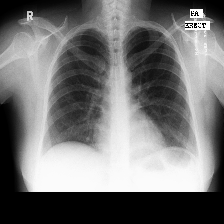

1/1 [==============================] - 0s 239ms/step
Normal Lungs
Prediction score: 0.0


In [14]:
# Load the new image, which was never seen by model
new_image_path = normal_dir + '/MCUCXR_0001_0.png'
new_image = image.load_img(new_image_path, target_size=image_size)
display(new_image)
# Preprocess the image
new_image_array = image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_array = preprocess_input(new_image_array)  # Preprocess the image

# Make a prediction
prediction = model.predict(new_image_array)
prediction = prediction[0][0]  # Get the predicted value from the output array

# Print the prediction
if prediction < 0.5:
    print("Normal Lungs")
else:
    print("Tuberculosis")

print(f"Prediction score: {prediction}")

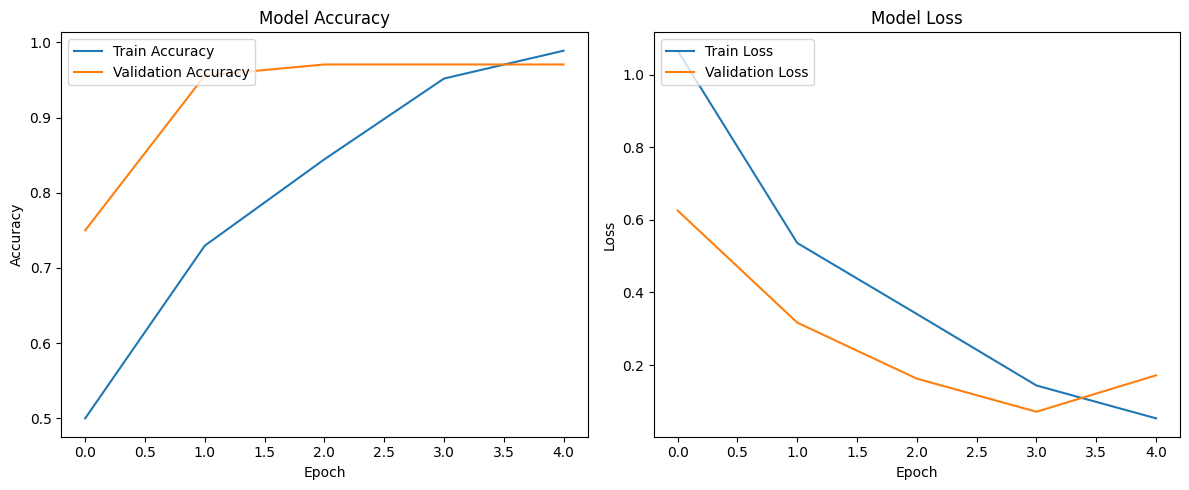

In [15]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()